In [26]:
import random
import math
import io
import cairocffi as cairo
from scipy.ndimage import imread
import matplotlib.pyplot as plt
%matplotlib inline

f = open("data/k1001.txt")
chset = f.read().splitlines()
print("loaded %d characters" % len(chset))

def get_random_ch():
    return chset[random.randrange(0,len(chset))]

loaded 2350 characters


done


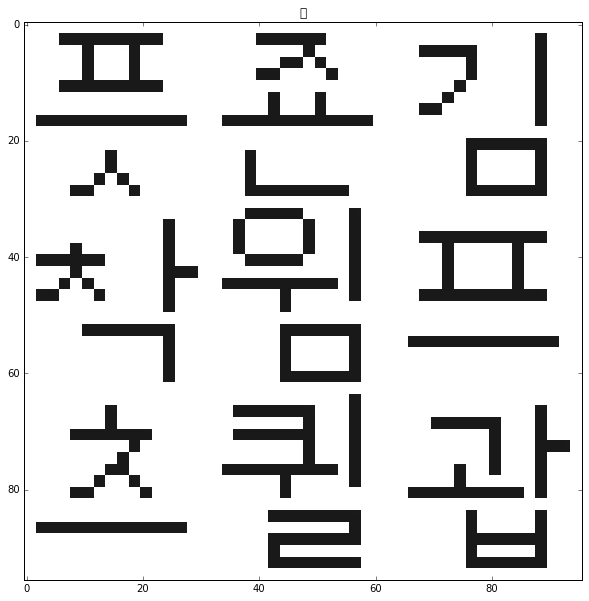

In [38]:

WIDTH, HEIGHT = 96, 96

surface = cairo.ImageSurface (cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context (surface)

ctx.set_source_rgb(0.1, 0.1, 0.1)
ctx.select_font_face("NanumGothic", cairo.FONT_SLANT_NORMAL, 
        cairo.FONT_WEIGHT_NORMAL)
ctx.set_font_size(32)

target = get_random_ch()

ctx.move_to(0, 28)
ctx.show_text(get_random_ch())
ctx.move_to(32, 28)
ctx.show_text(get_random_ch())
ctx.move_to(64, 28)
ctx.show_text(get_random_ch())
ctx.move_to(0, 60)
ctx.show_text(get_random_ch())
ctx.move_to(32, 60)
ctx.show_text(target)
ctx.move_to(64, 60)
ctx.show_text(get_random_ch())
ctx.move_to(0, 92)
ctx.show_text(get_random_ch())
ctx.move_to(32, 92)
ctx.show_text(get_random_ch())
ctx.move_to(64, 92)
ctx.show_text(get_random_ch())

f = io.BytesIO()
surface.write_to_png (f) # Output to PNG
surface.write_to_png ("example_text.png") # Output to PNG
cat = imread(f)
plt.figure(num=None, figsize=(10, 10), dpi=72, facecolor='w', edgecolor='k')
plt.title(target)
plt.imshow(cat, interpolation='none')

print("done")